In [29]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import scipy.stats as stats

In [30]:
# maximum number of rows to display
pd.options.display.max_rows = 50 

In [31]:
database_path = "/Users/suchirmvelpanur/Desktop/SDS-TA-Materials/Database Query Time/sqlite-sakila.db"

In [32]:
# Connecting to the database
connection = sqlite3.connect(database_path)

In [33]:
tables = pd.read_sql("""

SELECT *
FROM sqlite_master
WHERE type = 'table';

""", connection)

tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite-film.db,sqlite-film.db,37,"CREATE TABLE ""sqlite-film.db"" (\n""film_id"" INT..."
1,table,actor,actor,2,"CREATE TABLE ""actor"" (\n""actor_id"" INTEGER,\n ..."
2,table,country,country,5,"CREATE TABLE ""country"" (\n""country_id"" INTEGER..."
3,table,city,city,7,"CREATE TABLE ""city"" (\n""city_id"" INTEGER,\n ""..."
4,table,address,address,9,"CREATE TABLE ""address"" (\n""address_id"" INTEGER..."
5,table,language,language,11,"CREATE TABLE ""language"" (\n""language_id"" INTEG..."
6,table,category,category,12,"CREATE TABLE ""category"" (\n""category_id"" INTEG..."
7,table,customer,customer,13,"CREATE TABLE ""customer"" (\n""customer_id"" INTEG..."
8,table,film,film,15,"CREATE TABLE ""film"" (\n""film_id"" INTEGER,\n ""..."
9,table,film_actor,film_actor,20,"CREATE TABLE ""film_actor"" (\n""actor_id"" INTEGE..."


In [34]:
# Querying actor table
pd.read_sql("""

SELECT *
FROM actor;

""", connection)

,actor_id,first_name,last_name,last_update,query_response_time_ms
0,1,PENELOPE,GUINESS,2021-03-06 15:51:59,191.980663
1,2,NICK,WAHLBERG,2021-03-06 15:51:59,177.739010
2,3,ED,CHASE,2021-03-06 15:51:59,151.788911
3,4,JENNIFER,DAVIS,2021-03-06 15:51:59,130.591897
4,5,JOHNNY,LOLLOBRIGIDA,2021-03-06 15:51:59,170.946699
...,...,...,...,...,...
195,196,BELA,WALKEN,2021-03-06 15:52:00,163.214242
196,197,REESE,WEST,2021-03-06 15:52:00,149.410866
197,198,MARY,KEITEL,2021-03-06 15:52:00,166.574699
198,199,JULIA,FAWCETT,2021-03-06 15:52:00,156.717424


In [35]:
# Querying film table
pd.read_sql("""

SELECT *
FROM film;

""", connection)

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update,query_response_time_ms
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00,194.848147
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00,151.239769
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2021-03-06 15:52:00,163.290064
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,None,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2021-03-06 15:52:00,178.546493
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,None,6,2.99,130,22.99,G,Deleted Scenes,2021-03-06 15:52:00,119.365126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,YOUNG LANGUAGE,A Unbelieveable Yarn of a Boat And a Database ...,2006,1,None,6,0.99,183,9.99,G,"Trailers,Behind the Scenes",2021-03-06 15:52:08,127.943969
996,997,YOUTH KICK,A Touching Drama of a Teacher And a Cat who mu...,2006,1,None,4,0.99,179,14.99,NC-17,"Trailers,Behind the Scenes",2021-03-06 15:52:08,199.686248
997,998,ZHIVAGO CORE,A Fateful Yarn of a Composer And a Man who mus...,2006,1,None,6,0.99,105,10.99,NC-17,Deleted Scenes,2021-03-06 15:52:08,142.708164
998,999,ZOOLANDER FICTION,A Fateful Reflection of a Waitress And a Boat ...,2006,1,None,5,2.99,101,28.99,R,"Trailers,Deleted Scenes",2021-03-06 15:52:08,150.068638


In [36]:
#Using `COUNT()` to count the number of rows in a certain table or a specific column
pd.read_sql("""

SELECT COUNT(*)
FROM payment;

""", connection)

,COUNT(*)
0,16049


In [37]:
# count of rental_id column 
pd.read_sql("""

SELECT COUNT(rental_id)
FROM payment;

""", connection)

,COUNT(rental_id)
0,16044


In [38]:
pd.read_sql("""

SELECT *
FROM payment
WHERE rental_id IS NULL;

""", connection)

,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update,query_response_time_ms
0,424,16,1,None,1.99,2005-06-18 04:56:12.000,2021-03-06 15:56:00,193.187938
1,7011,259,2,None,1.99,2005-08-23 06:13:16.000,2021-03-06 15:56:55,116.792488
2,10840,401,1,None,0.99,2005-07-12 06:26:10.000,2021-03-06 15:57:27,165.498356
3,14675,546,1,None,3.99,2005-07-30 21:16:20.000,2021-03-06 15:57:58,123.128862
4,15458,577,2,None,0.99,2005-05-27 00:46:39.000,2021-03-06 15:58:04,137.074607


In [39]:
pd.read_sql("""

SELECT COUNT(return_date) 
FROM rental
WHERE return_date IS NULL;

""", connection)

,COUNT(return_date)
0,0


In [40]:
pd.read_sql("""

SELECT COUNT(*) 
FROM rental
WHERE return_date IS NULL;

""", connection)

,COUNT(*)
0,183


In [41]:
# MIN(), MAX(), AVERAGE() and Aggregation
pd.read_sql("""

SELECT
    rating
    ,MIN(length)
    ,MAX(length)
FROM film
WHERE rating = 'PG';

""", connection)

,rating,MIN(length),MAX(length)
0,PG,46,185


In [42]:
pd.read_sql("""

SELECT 
    rating
    ,MIN(length)
    ,MAX(length)
    ,ROUND(AVG(length), 0) AS Average
FROM film
GROUP BY rating;

""", connection)

,rating,MIN(length),MAX(length),Average
0,G,47,185,111.0
1,NC-17,46,184,113.0
2,PG,46,185,112.0
3,PG-13,46,185,120.0
4,R,49,185,119.0


In [43]:

films_per_rating = pd.read_sql("""

SELECT 
    rating AS Rating
    ,COUNT(title) AS Count
FROM film
GROUP BY rating
ORDER BY Count DESC

""", connection)

films_per_rating

,Rating,Count
0,PG-13,223
1,NC-17,210
2,R,195
3,PG,194
4,G,178


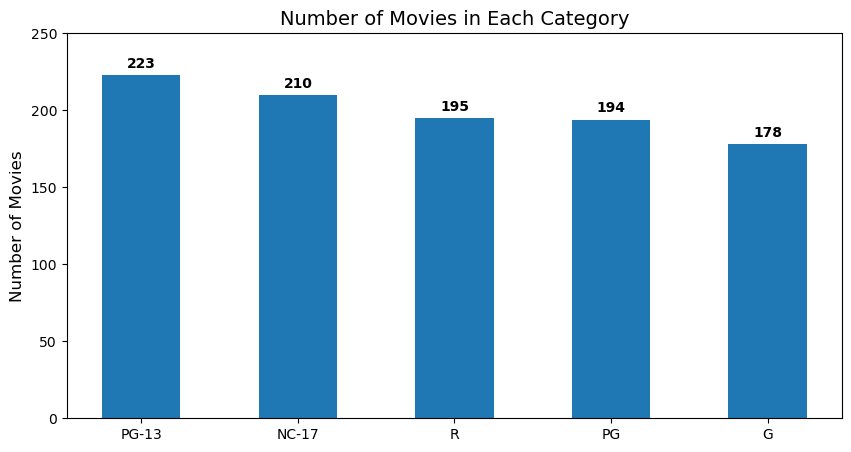

In [44]:
# Number of Movies in Each Category
fig, ax = plt.subplots(figsize = (10,5))

ypos = np.arange(len(films_per_rating["Count"]))
bars = ax.bar(ypos, films_per_rating["Count"], width = 0.50)
ax.set_xticks(ypos)
ax.set_xticklabels(films_per_rating["Rating"])
ax.set_ylim(ymax = 250)
ax.set_title("Number of Movies in Each Category", fontsize = 14)
ax.set_ylabel("Number of Movies", fontsize = 12)

for bar in bars: # add data labels
    height = bar.get_height()
    ax.annotate(f"{height}",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha="center", va="bottom",
                    fontweight="semibold")

plt.show()

In [45]:
#total number of movies in each category held in inventory

films_in_inv = pd.read_sql("""

SELECT
    rating AS Rating
    ,COUNT(title) AS Count
FROM inventory AS i
JOIN film as f
ON i.film_id = f.film_id
GROUP BY rating
ORDER BY Count DESC

""", connection)

films_in_inv

,Rating,Count
0,PG-13,1018
1,NC-17,944
2,PG,924
3,R,904
4,G,791


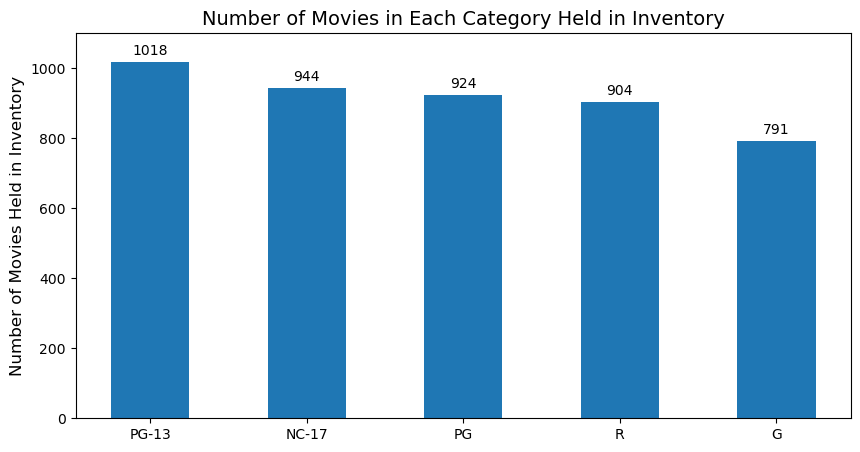

In [46]:
# Visualisation
fig, ax = plt.subplots(figsize = (10,5))

ypos = np.arange(len(films_in_inv["Count"]))
bars = ax.bar(ypos, films_in_inv["Count"], width = 0.50)
ax.set_xticks(ypos)
ax.set_xticklabels(films_in_inv["Rating"])
ax.set_ylim(ymax = 1100)
ax.set_title("Number of Movies in Each Category Held in Inventory", fontsize = 14)
ax.set_ylabel("Number of Movies Held in Inventory", fontsize = 12)

for bar in bars: # add data labels
    height = bar.get_height()
    ax.annotate(f"{height}",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha="center", va="bottom")

plt.show()

In [47]:
import sqlite3
import pandas as pd

# Specify the path to .db file
db_file = '/Users/suchirmvelpanur/Desktop/SDS-TA-Materials/Database Query Time/sqlite-sakila.db'  # Replace with your actual .db file path

# Connect to the SQLite database
conn = sqlite3.connect(db_file)

# Create a cursor object
cursor = conn.cursor()

# List all tables in the database to identify the table needed to export
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables in the database:", tables)

Tables in the database: [('sqlite-film.db',), ('actor',), ('country',), ('city',), ('address',), ('language',), ('category',), ('customer',), ('film',), ('film_actor',), ('film_category',), ('film_text',), ('inventory',), ('staff',), ('store',), ('payment',), ('rental',)]


In [48]:
# Step 1 : Export any table from main database for analysis
table_name = 'film'  

# Read the table into a pandas DataFrame
df = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)

# Export it to a csv file
csv_file = 'sqlite-film.csv'  
df.to_csv(csv_file, index=False)
print(f"Table '{table_name}' has been exported to '{csv_file}'.")



Table 'film' has been exported to 'sqlite-film.csv'.


In [49]:
df

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update,query_response_time_ms
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00,194.848147
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00,151.239769
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2021-03-06 15:52:00,163.290064
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,None,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2021-03-06 15:52:00,178.546493
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,None,6,2.99,130,22.99,G,Deleted Scenes,2021-03-06 15:52:00,119.365126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,YOUNG LANGUAGE,A Unbelieveable Yarn of a Boat And a Database ...,2006,1,None,6,0.99,183,9.99,G,"Trailers,Behind the Scenes",2021-03-06 15:52:08,127.943969
996,997,YOUTH KICK,A Touching Drama of a Teacher And a Cat who mu...,2006,1,None,4,0.99,179,14.99,NC-17,"Trailers,Behind the Scenes",2021-03-06 15:52:08,199.686248
997,998,ZHIVAGO CORE,A Fateful Yarn of a Composer And a Man who mus...,2006,1,None,6,0.99,105,10.99,NC-17,Deleted Scenes,2021-03-06 15:52:08,142.708164
998,999,ZOOLANDER FICTION,A Fateful Reflection of a Waitress And a Boat ...,2006,1,None,5,2.99,101,28.99,R,"Trailers,Deleted Scenes",2021-03-06 15:52:08,150.068638


In [50]:
# Step 2: Calculate sample mean and standard deviation
sample_mean = np.mean(df['query_response_time_ms'])
sample_std = np.std(df['query_response_time_ms'], ddof=1)  # Sample standard deviation

In [51]:
# Display the sample mean and standard deviation
print(f"Sample Mean (Estimated Query Response Time): {sample_mean:.2f} ms")
print(f"Sample Standard Deviation: {sample_std:.2f} ms")

Sample Mean (Estimated Query Response Time): 149.62 ms
Sample Standard Deviation: 30.74 ms


In [52]:
# Step 3: Calculate the 95% confidence interval for the mean using CLT
confidence_level = 0.95
degrees_freedom = len(df['query_response_time_ms']) - 1
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, loc=sample_mean, scale=stats.sem(df['query_response_time_ms']))

print(f"95% Confidence Interval for the Mean: {confidence_interval[0]:.2f} ms to {confidence_interval[1]:.2f} ms")

95% Confidence Interval for the Mean: 147.71 ms to 151.53 ms


Text(0, 0.5, 'Density')

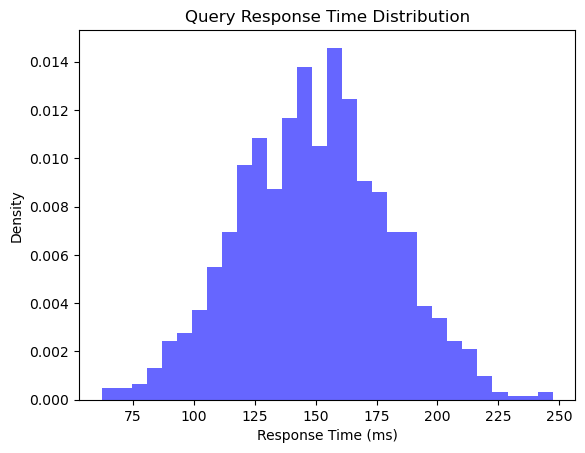

In [53]:
# Step 4: Visualize the distribution of the query response times
plt.hist(df['query_response_time_ms'], bins=30, density=True, alpha=0.6, color='b')
plt.title('Query Response Time Distribution')
plt.xlabel('Response Time (ms)')
plt.ylabel('Density')

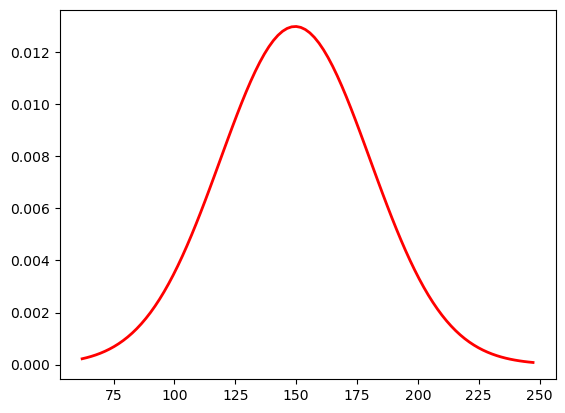

In [54]:

# Display the normal distribution curve
x = np.linspace(min(df['query_response_time_ms']), max(df['query_response_time_ms']), 100)
plt.plot(x, 1/(sample_std * np.sqrt(2 * np.pi)) * np.exp(- (x - sample_mean)**2 / (2 * sample_std**2)), linewidth=2, color='r')
plt.show()